# Customer Segmentation Project.
# Market Basket Analysis.

# Case Study

It has always been important for businesses to understand customer behaviours in order to ensure that products or services are tailored towards maximum profitability. For this case study, we will refer to a dataset with customer shopping data on customer’s gender, city, customer‘s annual income, credit score, and spending score found here. This data was obtained on several cities in India as will be seen in the dataset. Data visualization will be done (in Python) to make comparisons between the different features of the dataset.  

#  1. Defining the Goal of Customer Segmentation

Customer Segmentation is the process of division of customer base into several groups of individuals that share a similarity in different ways that are relevant to marketing. Behaviour leads to Customer Segmentation, why Using clustering, companies, Malls, supermarkets and Restaurants can identify segments of customers to target the potential user base. We will divide customers into groups according to common characteristics like gender, city, customer‘s annual income, credit score, and spending score. Through this we get deeper understanding of the customer preferences as well as the requirements for discovering valuable segments that would help us gain maximum profit for the company.
secondly we strategize the marketing techniques more efficiently and reduce the risk of investment.

#  2. Get the Data

We need to understand the data set in detail. We develop a brief understanding of the data set of which we will be working with. For example how many features are there in the data set , how many unique labels, How are they distributed or how are the labels distributed.

In [1]:
#We import the libraries for performing basic mathmatical operations and tabular Dataset that we intend to use in developing our model project.
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv
import numpy as np #linear algebra
from pandas import plotting
import seaborn as sns #Python library for Visualization
import matplotlib.pyplot as plt #Data Visualization
import plotly as py # Data plotting

#  Load the Data set.

In [2]:
#We now load the data set.

In [3]:
Data=pd.read_csv("C:\\Users\\nongaya\\Desktop\\Jenga-Project\\Mall_Customers.csv",header="infer")# we now read the data.

In [4]:
Data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
Data.head()# we explore the headers on the datasets to understand the features.

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
Data.tail()# we explore the tail on the datasets to understand it. Shows the bottom Data in the set

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
Data.tail().T# We explore the data sets to check on the headers conformity and understand it.

,195,196,197,198,199
CustomerID,196,197,198,199,200
Gender,Female,Female,Male,Male,Male
Age,35,45,32,32,30
Annual Income (k$),120,126,126,137,137
Spending Score (1-100),79,28,74,18,83


In [8]:
Data.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
25,26,Male,29,28,82
122,123,Female,40,69,58
7,8,Female,23,18,94
147,148,Female,32,77,74
153,154,Female,38,78,76
72,73,Female,60,50,49
22,23,Female,46,25,5
53,54,Male,59,43,60
15,16,Male,22,20,79
175,176,Female,30,88,86


In [9]:
Data.T# we visualize the data set in tabular form

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
CustomerID,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
Gender,Male,Male,Female,Female,Female,Female,Female,Female,Male,Female,...,Female,Female,Male,Female,Female,Female,Female,Male,Male,Male
Age,19,21,20,23,31,22,35,23,64,30,...,34,32,33,38,47,35,45,32,32,30
Annual Income (k$),15,15,16,16,17,17,18,18,19,19,...,103,103,113,113,120,120,126,126,137,137
Spending Score (1-100),39,81,6,77,40,76,6,94,3,72,...,23,69,8,91,16,79,28,74,18,83


# 3. Clean the Data.

In [10]:
Data.isnull().sum()#Check if there are any missing values.

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
# This shows our data set does not have any missing values which means its clean.

In [12]:
len(Data)#Shows how much data the Dataset contains:

200

In [13]:
Data.info() #This displays all columns and their data types,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
Data.describe()# This shows you some basic descriptive statistics for all numeric columns in the data set.which includes the count,mean,standard deviation,min and max

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 4. Enrich the data set to obtain reports.

In [15]:
#We now check for the data types in the data set.
Data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [16]:
# We now visualize the columns in the data set.
Data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [17]:
# We now rename the columns in the data set.

Data.rename(columns={'Annual Income (k$)':'AnnualIncome','Spending Score (1-100)':'SpendingScore'},inplace=True)

In [18]:
# We use the concept of for loop in our data set  to understatand for data's columns
for i,col in enumerate(Data.columns):
    print((i+1),'. columns is :',col)

1 . columns is : CustomerID
2 . columns is : Gender
3 . columns is : Age
4 . columns is : AnnualIncome
5 . columns is : SpendingScore


In [19]:
# Lets Perform the row and columns count in our data set.
Data.shape

(200, 5)

In [20]:
#Check for null values count  in our data set.
Data.isnull().sum()

CustomerID       0
Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [21]:
#Lets check for every feature control  null value in this data # False mean our data is clean.
print(list(Data.isnull().any()))

[False, False, False, False, False]


In [22]:
#lWe check for data control null values in our data sets.
Data.isnull().values.any()

False

In [23]:
#checking for data correlation in our data set.
Data.corr()

,CustomerID,Age,AnnualIncome,SpendingScore
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
AnnualIncome,0.977548,-0.012398,1.000000,0.009903
SpendingScore,0.013835,-0.327227,0.009903,1.000000


In [24]:
Data.iloc[:,1:].corr()# we check for data correlation in our features as headers.

,Age,AnnualIncome,SpendingScore
Age,1.000000,-0.012398,-0.327227
AnnualIncome,-0.012398,1.000000,0.009903
SpendingScore,-0.327227,0.009903,1.000000


# 5.Find Insights and Visualize Data set.

We intend to drop the customer id from our data set since the customer id does not have the insights or does not draw any correlationship or unique feature with the rest of features in the data set. Hence we end up having Age,AnnualIncome,Spending Score and Gender in our data set.
Therefore we will use this to visualize the data set.

In [25]:
#del Data['CustomerID']
Data.drop('CustomerID', axis=1, inplace=True)

In [26]:
Data# we now check if we have dropped successfully the CustomerId column  in our data set.

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


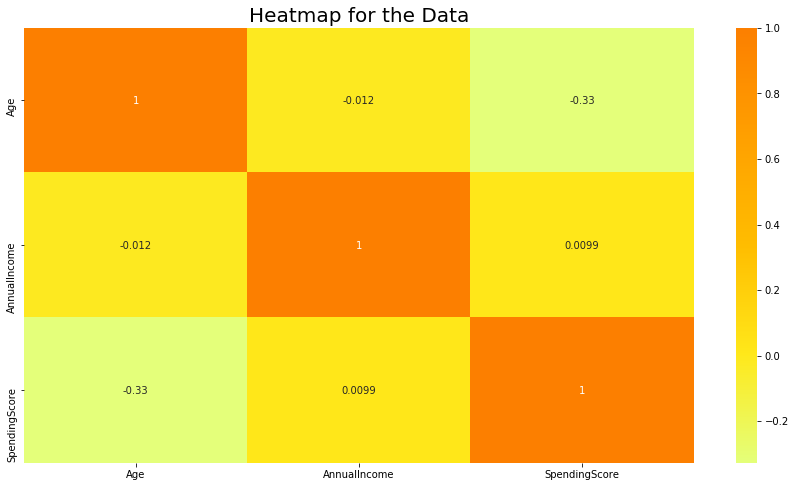

In [27]:
# We now check for Correlation between the different attributes of the Mall Customer Segementation Dataset,
plt.rcParams['figure.figsize'] = (15, 8)
sns.heatmap(Data.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

The above graph shows the correlation between the different attributes of the Mall Customer Segementation Dataset, 
This Heat map reflects the most correlated features with Orange Color and least correlated features with yellow color

# 5.1 Customer Gender Visualization

We now create a bar graph and pie chart to check on customer Gender(Male and Female) distribution on our customer mall data set.

In [28]:
#We now check for the data Gender Unique
Data.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [29]:
#Lets now check on Data Gender counts for our data set.
Data.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

## What gender is higher in density to the customer population?

We can only answer this question by plotting the unique count for our mall customers. which counts the unique number of entries for each Gender within the data set in Mall.

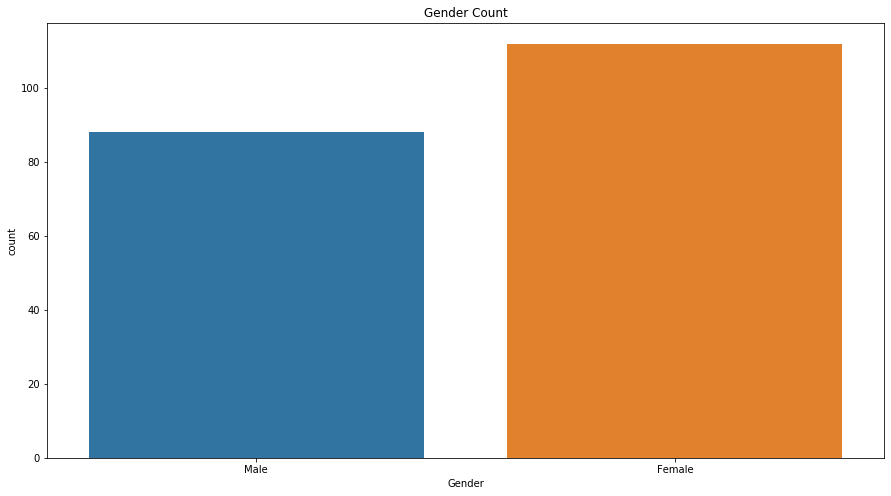

In [30]:
#We plot a graph on data gender count for women and men for our data set.
sns.countplot(Data.Gender)
plt.title('Gender Count')
plt.show()

## 5. 2 We Visualize the Ratio of Male: Female by use of Pie Chart.

From the above barplot, we observe that the number of females is higher than the males. Now, let us visualize a pie chart to observe the ratio of male and female distribution.

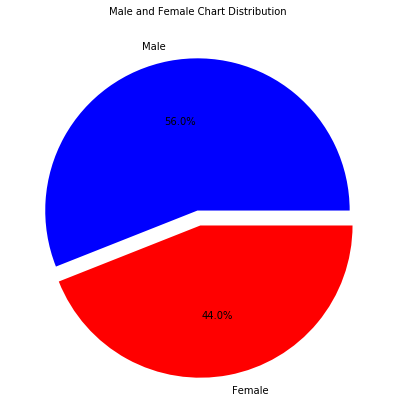

In [31]:
# we now match label on data set gender..assign blue to male and red to female
labels=Data.Gender.unique()
colors=['blue','red']
explode=[0,0.1]
values=Data.Gender.value_counts().values

#We now carry out the visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Male and Female Chart Distribution',color='black',fontsize=10)
plt.show()

Now From the above piechart, we conclude that the percentage of females is 56%, whereas the percentage of male in the customer dataset is 44%

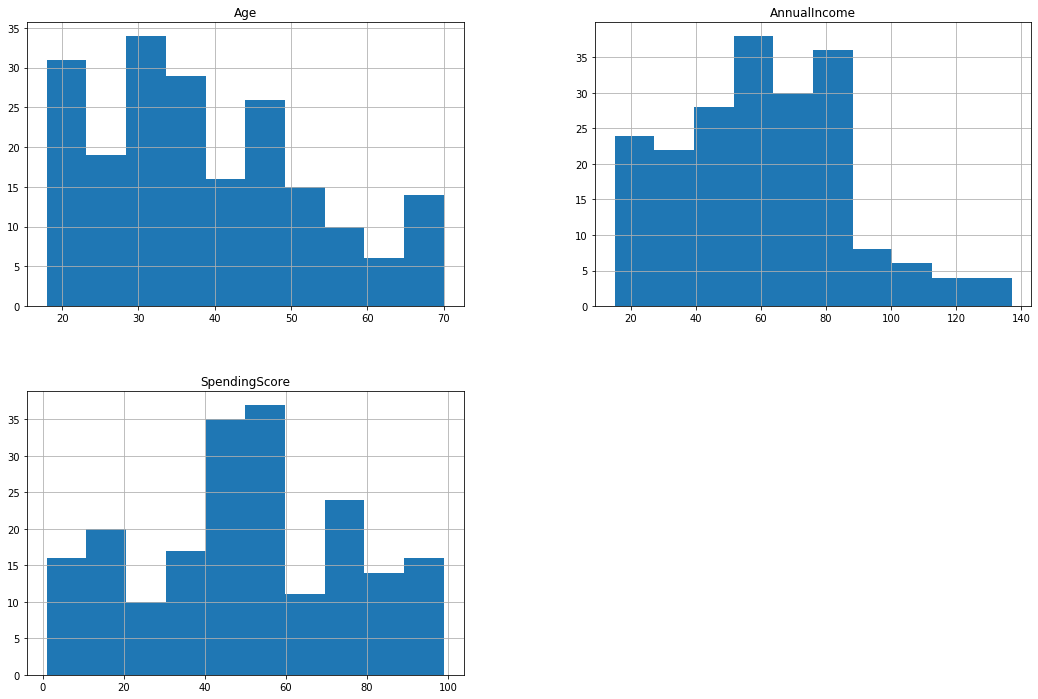

In [32]:
# We now visualize the data in histogram distribution 
Data.hist(figsize=(18,12))
plt.title('All Data Show Histogram System')
plt.show()

## 6.Iteration of Mall Customer Data.

## 6.1 Customer's distribution based on age.

We now check the customer distribution based on the age. our obejctive is to identify which age group visits the Mall mostly.
Therefore we now plot the customer's distribution based on the age.

Text(0.5, 1.0, 'Age Distribution')

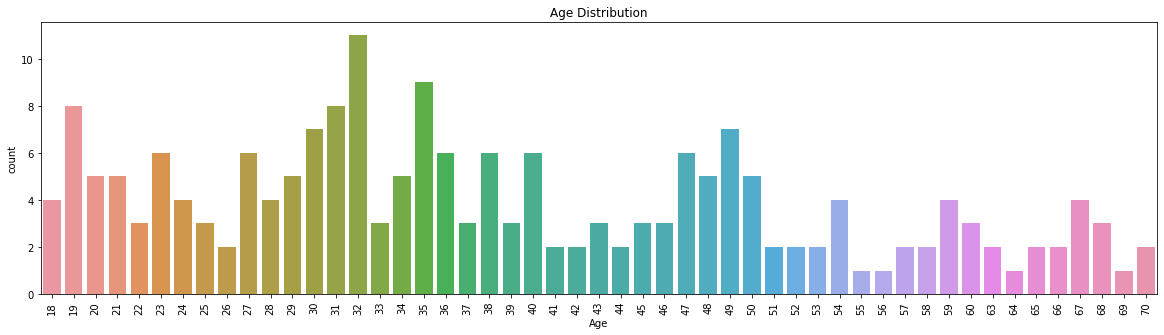

In [33]:
# Customer's distribution based on age
plt.figure(figsize=(20,5))
sns.countplot(Data['Age'])
plt.xticks(rotation=90)
plt.title('Age Distribution')

We note that people who are of  age between 25 to 40 are mostly visiting mall than other age groups.

People at Age 32 are the Most Frequent Visitors in the Mall.
People of Age 55, 56, 64, 69 are very less frequent in the Malls (older age,above 50s groups are lesser frequent in comparison).
Ages from 19 and 31 are very much frequent.

In [34]:
#We now check for Male Age Distribution
print('Max  :',max(Data[Data['Gender']=='Male'].Age))
print('Min  :',min(Data[Data['Gender']=='Male'].Age))
print('Mean :',np.mean(Data[Data['Gender']=='Male'].Age))
print('Std  :',np.std(Data[Data['Gender']=='Male'].Age))

Max  : 70
Min  : 18
Mean : 39.80681818181818
Std  : 15.426407372472942


The maximum Age is 70, minimum 18 average age 39 for Male Gender in our data set.

In [35]:
#Lets Check for Female Age Distribution in our Data Set.
print('Max  :',max(Data[Data['Gender']=='Female'].Age))
print('Min  :',min(Data[Data['Gender']=='Female'].Age))
print('Mean :',np.mean(Data[Data['Gender']=='Female'].Age))
print('Std  :',np.std(Data[Data['Gender']=='Female'].Age))

Max  : 68
Min  : 18
Mean : 38.098214285714285
Std  : 12.587522039581053


The maximum Age is 68, minimum 18 average age 38 for Female Gender in our data set with a standard diaviation of 12.5

# 6.2 Customer Annuallncome Per Gender.

We now check on the customer annual income using the, our objective is to determine the maximum, minimum, mean and the standard deviation for our Male customers in the mall.

In [36]:
#check for the Male AnnualIncome 
print('Max  :',max(Data[Data['Gender']=='Male'].AnnualIncome))
print('Min  :',min(Data[Data['Gender']=='Male'].AnnualIncome))
print('Mean :',np.mean(Data[Data['Gender']=='Male'].AnnualIncome))
print('Std  :',np.std(Data[Data['Gender']=='Male'].AnnualIncome))

Max  : 137
Min  : 15
Mean : 62.22727272727273
Std  : 26.486586344758496


We note that our maximum is, 137, minimum, 15, mean, 62.2, with standard variation of 26.4 anuallcome. 

In [37]:
#check for the Female AnnualIncome 
print('Max  :',max(Data[Data['Gender']=='Female'].AnnualIncome))
print('Min  :',min(Data[Data['Gender']=='Female'].AnnualIncome))
print('Mean :',np.mean(Data[Data['Gender']=='Female'].AnnualIncome))
print('Std  :',np.std(Data[Data['Gender']=='Female'].AnnualIncome))

Max  : 126
Min  : 16
Mean : 59.25
Std  : 25.8955663607278


We note that our maximum is, 126, minimum, 16, mean, 59.25, with standard variation of 25.8 anuallcome.

Text(0.5, 1.0, 'Distribution of AnnualIncome')

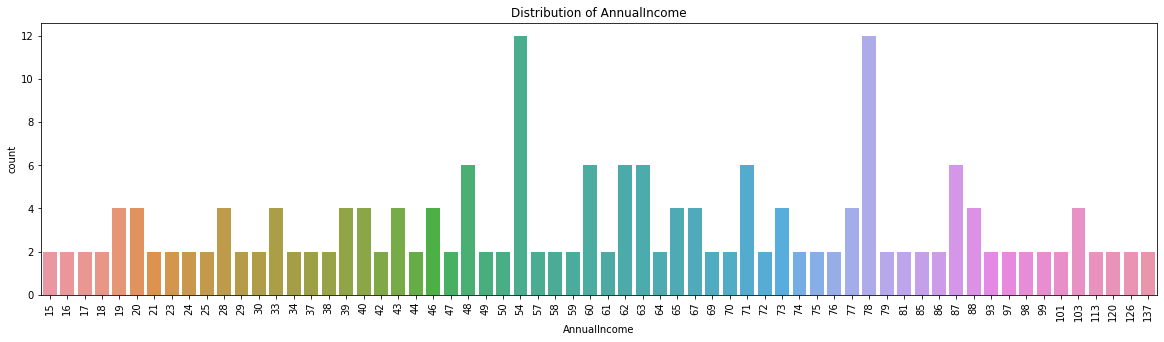

In [38]:
#We now visualize the Distribution of Annual Income of the Mall Customers.
plt.figure(figsize=(20,5))
sns.countplot(Data['AnnualIncome'])
plt.xticks(rotation=90)
plt.title('Distribution of AnnualIncome')

We note that the A wide veriety of income is visible ranging from 15k$ to 137k$ we can visualize the range on our bar plot.

Customers above 100k$ are 12

Customers below 25k$ are 22

So 166 customers have income between 25k$ and 100k$(ie.,83%)

# 6.3 Analyzing Spending Score of the Customers.

We need to determine the minimum, average and the maximum spending score for our Mall Customers.

In [39]:
#We now check for the male customers spending score.
print('Max  :',max(Data[Data['Gender']=='Male'].SpendingScore))
print('Min  :',min(Data[Data['Gender']=='Male'].SpendingScore))
print('Mean :',np.mean(Data[Data['Gender']=='Male'].SpendingScore))
print('Std  :',np.std(Data[Data['Gender']=='Male'].SpendingScore))

Max  : 97
Min  : 1
Mean : 48.51136363636363
Std  : 27.737812359739767


In [40]:
#We now check for the female customers spending score.
print('Max  :',max(Data[Data['Gender']=='Female'].SpendingScore))
print('Min  :',min(Data[Data['Gender']=='Female'].SpendingScore))
print('Mean :',np.mean(Data[Data['Gender']=='Female'].SpendingScore))
print('Std  :',np.std(Data[Data['Gender']=='Female'].SpendingScore))

Max  : 99
Min  : 5
Mean : 51.526785714285715
Std  : 24.007052468801657


In [41]:
#We now visualize the Spending Score for our Mall Customers.
#plt.figure(figsize=(18,8))
#sns.countplot(Data['SpendingScore'])
#plt.xticks(rotation=90)
#plt.title('Distribution of SpendingScore')

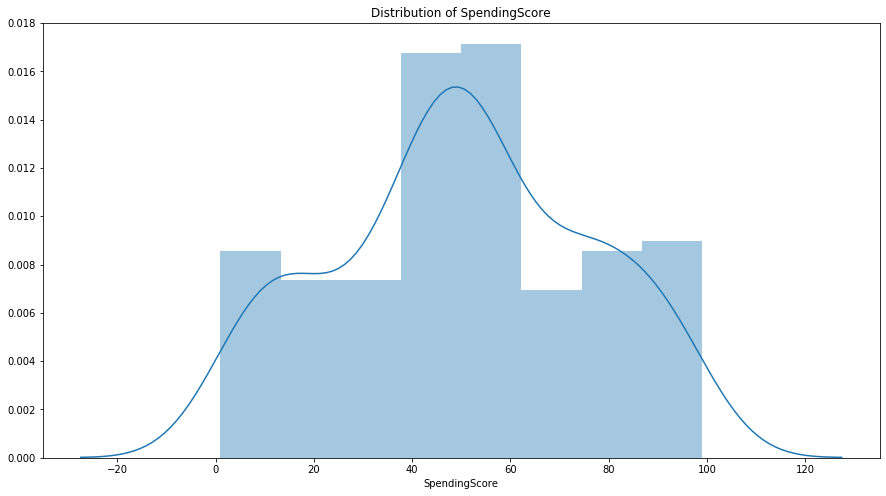

<Figure size 1296x576 with 0 Axes>

In [42]:
# We now visualize our data using Histogram to show Spending Score Distribution

plt.title('Distribution of SpendingScore')
sns.distplot(Data["SpendingScore"])
plt.figure(figsize=(18,8))
plt.show()


From our Data set we note that there are customers having 1 as spending score also, and 99 Spending score,
Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.
Most of the Customers have their Spending Score in the range of 30-70.

# 6.4  More Comparisons on Spending Score vs Gender and Annual Income Vs Gender.

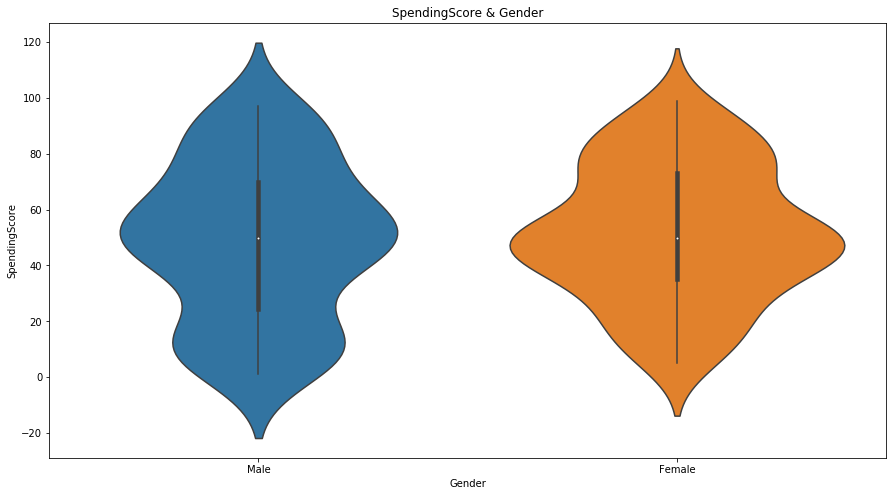

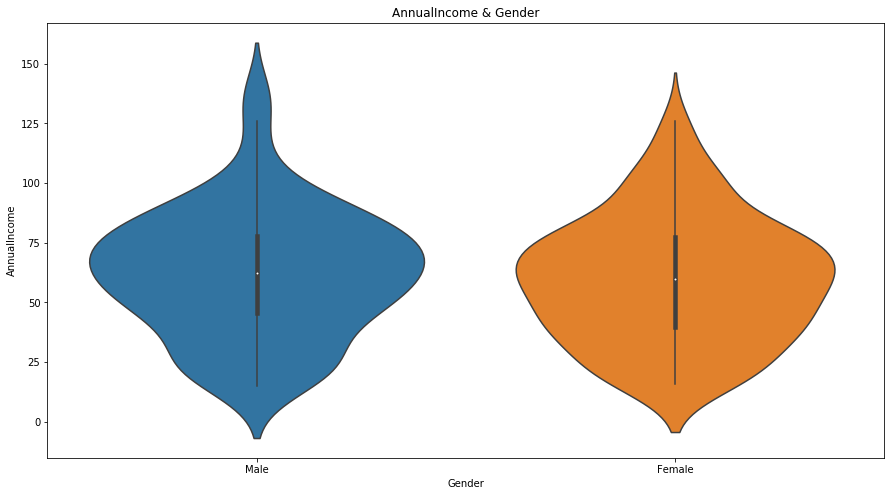

In [43]:
#We now map our data y label with Spending Score vs x label with Gender.
sns.violinplot(y=Data['SpendingScore'],x=Data['Gender'])
plt.title('SpendingScore & Gender')
plt.show()

#We now map our data y label with AnnualIncome vs x label with Gender.
sns.violinplot(y=Data['AnnualIncome'],x=Data['Gender'])
plt.title('AnnualIncome & Gender')
plt.show()

##  Based on Spending Score.
From the above we note that Regarding Spending Score
The Male customers  have a Spending Score estimate of  25 to 70 and the female customers depict a spending score estimate  of  35 to 75
Therefore we can Conclude that the female customers are ranked as the most shopping customers at the mall.

## Based on Annuallncome.
from the above the male most of the males have a spending annual income between 45k$ to 75K$ and female customers have a annual income of 35k$ to 75k$.


# 7.0 K Means Clustering.

K-means clustering is a clustering algorithm that aims to partition n observations into k clusters.
Initialisation – K initial “means” (centroids) are generated at random
Assignment – K clusters are created by associating each observation with the nearest centroid
Update – The centroid of the clusters becomes the new mean,
Assignment and Update are repeated iteratively until convergence
The end result is that the sum of squared errors is minimised between points and their respective centroids.
We will use KMeans Clustering. At first we will find the optimal clusters based on inertia and using elbow method. The distance between the centroids and the data points should be less.

In [44]:
# We recheck for the missing value computation.
Data.isnull().sum()

Gender           0
Age              0
AnnualIncome     0
SpendingScore    0
dtype: int64

In [45]:
#Lets perform  feature sleection for the model.
#Lets consider only the two features  (Annual income and Spending Score)
x = Data.iloc[:, [2, 3]].values

# 8.0 Building the Model

We use the  elbow method  to determine the optimal number of clusters in k-means clustering.The elbow method plots the value of the cost function produced by different values of k. As you know, if k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids.

In [46]:
#Building the Model
#We use KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
#We always assume the max number of clusters would be 10
# We  can judge the number of clusters by doing averaging
from sklearn.cluster import KMeans
wcss=[]

# We use the below static code to get max number of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#inertia_ is the formula used to segregate the data points into clusters

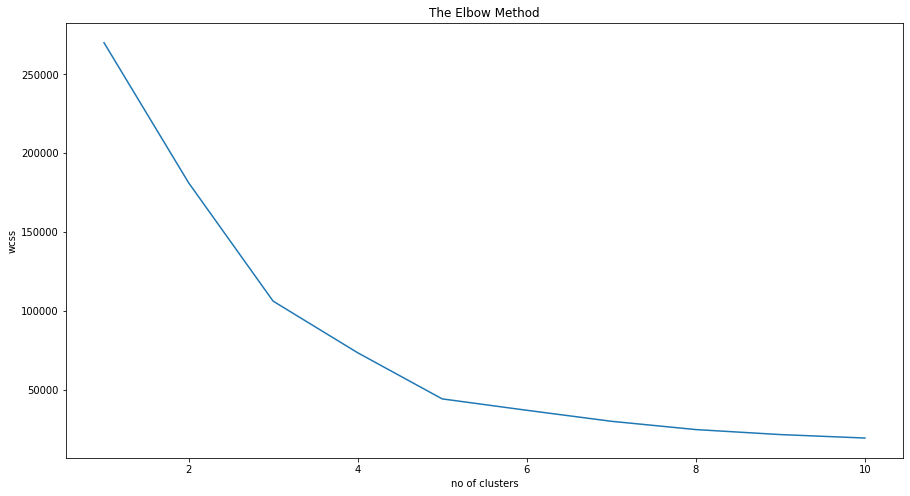

In [47]:
#Visualize the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

It is clear from the figure that we should take the number of clusters equal to 5, as the slope of the curve is not steep enough after it.
when we zoom out this curve then you will see that last elbow comes at k=5, it would be difficult to visualize the elbow if we choose the higher range. This why its usually recommended to pick a range of 1 to 11
Therefore our k=5


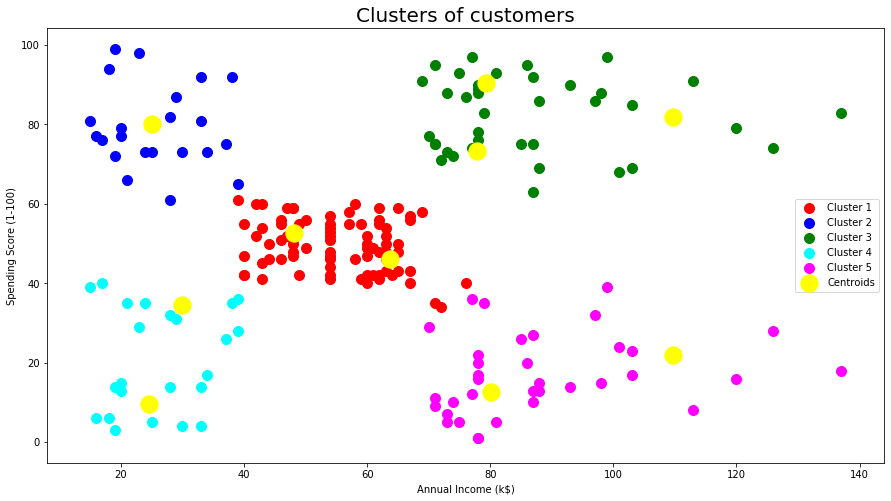

In [48]:
#Model Build
#our data set is for  unsupervised learning therefore we will use "fit_predict()"
#suppose we were working with  supervised learning data set we would use "fit_tranform()"
#y_kmeans is our final model.
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

#Visualizing all our the clusters 

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')# Repeat for the same for the rest of the clusters.
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers', fontsize = 20)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# 8.1  K Means Model Interpretation and Analysis.

The model is divided in clusters,( Cluster 1 to Cluster 5)
So we have 5 clusters divided based on Annual Income and Spending Score

Cluster 1 (Red Color) -Normal Customer 

Customers are average in terms of earning and spending
An Average consumer in terms of spending and Annual Income
we see that people have average income and an average spending score, these people again will not be the prime targets of the shops or mall, but again they will be considered and other data analysis techniques may be used to increase their spending score.

Cluster 2 (Blue Colr) -Spender 

This type of customers earns less but spends more
Annual Income is less but spending high, so can also be treated as potential target customer
we can see that people have low income but higher spending scores, these are those people who for some reason love to buy products more often even though they have a low income. 
Maybe it’s because these people are more than satisfied with the mall services. 
The shops/malls might not target these people that effectively but still will not lose them.

Cluster 3 (Green Color) -Target Customers

Earning high and also spending high Target Customers.
Annual Income High as well as Spending Score is high, so a target consumer.
we see that people have high income and high spending scores, this is the ideal case for the mall or shops as these people are the prime sources of profit. These people might be the regular customers of the mall and are convinced by the mall’s facilities.

Cluster 4 (cyan Color)- Balanced Customers

The earn less and spend less too.
we can see people have low annual income and low spending scores, this is quite reasonable as people having low salaries prefer to buy less, 
in fact, these are the wise people who know how to spend and save money. 
The shops/mall will be least interested in people belonging to this cluster.

Cluster 5 (magenta Color) - Pinch Penny Customers

Earning high and spending less.- 
we see that people have high income but low spending scores, this is interesting. Maybe these are the people who are unsatisfied or unhappy by the mall’s services. These can be the prime targets of the mall, as they have the potential to spend money. So, the mall authorities will try to add new facilities so that they can attract these people and can meet their needs.




# 9.0 Conclusion and Report


We have explored the five segments based customers  Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall. They include; Pinch Penny Customers,Balanced Customers,Target Customers,Spender and the normal customer.
We can put Cluster 3 into some alerting system where sms and emails can be send to them on daily basis regarding the offers and discounts that they can get at the Mall; while the rest we can set once per week in a month for blast sms to notify them about our products.

Similarly 
Now we know customers behaviour depending upon their Annual Income and Spending Score. 
There can be many marketing strategies applied for Customers on these Cluster Analysis.
High income and High spending score customers are our target customers and we would always want to retain them
as they give the most profit margin to our organization. 
High Income and Less spending score customers can be 
attracted with wide range of products in their life style demands and it might attract them towards the Mall Supermarket.
Less Income Less Spending Score can be given extra offers and constantly sending them the offers
and discounts will attract them towards spending.
We can also have a cluster anaysis done on what kind of products customers tend to buy and can make other marketing strategies accordingly. The data set did not have enough data to carry out more analytics on the same.

# 10. Recommendation.

Companies, Malls, super markets on Small Business Enterprises should carry out Market Basket Analysis for their business. This will enable companies to target specific groups of customers, a customer segmentation model allows for the effective allocation of marketing resources and the maximization of cross- and up-selling opportunities.
When a group of customers is sent personalized messages as part of a marketing mix that is designed around their needs, it's easier for companies to send those customers special offers meant to encourage them to buy more products. Customer segmentation can also improve customer service and assist in customer loyalty and retention.
As a by-product of its personalized nature, marketing materials sent out using customer segmentation tend to be more valued and appreciated by the customer who receives them as opposed to impersonal brand messaging that doesn't acknowledge purchase history or any kind of customer relationship
Finally with customer segmentation Companies will stay a step ahead of competitors in specific sections of the market and identify new products that exist or potential customers could be interested in or improving products to meet customer expectations.